# 데이터셋 출처
* https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성
* Pregnancies : 임신횟수
* Glucose : 2시간 동안의경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린(mu U / ml)
* BMI : 체질량 지수(체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [5]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [7]:
# 데이터셋을 미리보기

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용할 데이터셋 만들기

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [15]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
    'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [16]:
y = df["Outcome"]
y.shape

(768,)

In [28]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만들기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [31]:
# train 세트의 문제와 정답의 데이터 수 확인

X_train.shape, y_train.shape

((614, 9), (614,))

In [32]:
# test 세트의 문제와 정답의 데이터 수 확인

X_test.shape, y_test.shape

((154, 9), (154,))

# 학습과 예측하기

In [76]:
# DecisionTree 를 불러오기

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

## 최적의 max_depth 값 찾기

In [86]:
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


## Grid Search

In [89]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   10.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [90]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [91]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [92]:
clf.best_score_

0.8664934026389444

In [96]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.010993,0.002279,0.005997,0.002096,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.010593,0.001743,0.005198,0.000399,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.010193,0.001326,0.006798,0.003248,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.011392,0.001355,0.005198,0.000399,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.868852,0.858323,0.028361,4
27,0.012791,0.004259,0.007397,0.005311,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [97]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [98]:
clf.score(X_test, y_test)

0.8701298701298701

## Random  search

In [142]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([15, 14, 15, 13,  8,  4, 17,  5, 10, 19])

In [143]:
max_features = np.random.uniform(0.7, 1.0, 100)
max_features

array([0.74805502, 0.90076359, 0.876649  , 0.71917243, 0.81535976,
       0.96147872, 0.95295788, 0.96929774, 0.95452944, 0.78127929,
       0.8189761 , 0.74553017, 0.98939578, 0.91278469, 0.87352838,
       0.87087898, 0.71046338, 0.82062501, 0.92060461, 0.92131262,
       0.96369276, 0.85616097, 0.78402115, 0.84359661, 0.96537115,
       0.74746578, 0.77360445, 0.89597201, 0.72763183, 0.72347112,
       0.74204043, 0.99220356, 0.83085803, 0.72309426, 0.93115052,
       0.77056758, 0.86916612, 0.97128976, 0.97853738, 0.79078077,
       0.84839683, 0.8116033 , 0.99850913, 0.83261365, 0.8291197 ,
       0.70062254, 0.71148695, 0.79078773, 0.70798014, 0.90140235,
       0.89810833, 0.91759547, 0.99986614, 0.9840365 , 0.7648266 ,
       0.81314649, 0.84941443, 0.91091535, 0.84295558, 0.99185732,
       0.83099645, 0.9757891 , 0.93383771, 0.96829715, 0.92452241,
       0.84795164, 0.71882964, 0.75188239, 0.77510642, 0.72940777,
       0.98100693, 0.83874306, 0.8597684 , 0.85494053, 0.78110

In [144]:
param_distributions = {"max_depth": max_depth,
                       "max_features":max_features,
                       "min_samples_split": range(2, 7)}
param_distributions

{'max_depth': array([15, 14, 15, 13,  8,  4, 17,  5, 10, 19]),
 'max_features': array([0.74805502, 0.90076359, 0.876649  , 0.71917243, 0.81535976,
        0.96147872, 0.95295788, 0.96929774, 0.95452944, 0.78127929,
        0.8189761 , 0.74553017, 0.98939578, 0.91278469, 0.87352838,
        0.87087898, 0.71046338, 0.82062501, 0.92060461, 0.92131262,
        0.96369276, 0.85616097, 0.78402115, 0.84359661, 0.96537115,
        0.74746578, 0.77360445, 0.89597201, 0.72763183, 0.72347112,
        0.74204043, 0.99220356, 0.83085803, 0.72309426, 0.93115052,
        0.77056758, 0.86916612, 0.97128976, 0.97853738, 0.79078077,
        0.84839683, 0.8116033 , 0.99850913, 0.83261365, 0.8291197 ,
        0.70062254, 0.71148695, 0.79078773, 0.70798014, 0.90140235,
        0.89810833, 0.91759547, 0.99986614, 0.9840365 , 0.7648266 ,
        0.81314649, 0.84941443, 0.91091535, 0.84295558, 0.99185732,
        0.83099645, 0.9757891 , 0.93383771, 0.96829715, 0.92452241,
        0.84795164, 0.71882964, 0.751

In [145]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([15, 14, 15, 13,  8,  4, 17,  5, 10, 19]),
                                        'max_features': array([0.74805502, 0.90076359, 0.876649  , 0.71917243, 0.81535976,
       0.96147872, 0.95295788, 0.96929774, 0.95452944, 0.78127929,
       0.8189761 , 0.74553017, 0.98939578, 0.91278469, 0.87352838,
       0...
       0.98100693, 0.83874306, 0.8597684 , 0.85494053, 0.78110551,
       0.965266  , 0.87514536, 0.81668549, 0.88756797, 0.91805875,
       0.90605305, 0.96372479, 0.76990608, 0.78881124, 0.73567943,
       0.71374165, 0.91477874, 0.92394314, 0.79035971, 0.95304069,
       0.99146319, 0.81794115, 0.94452984, 0.99014731, 0.80119624,
       0.94775417, 0.99637722, 0.76305739, 0.91140703, 0.74672733]),
                                        'min_samples_split': range(2, 7)},
                   random_state

In [146]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7455301747282396, 'max_depth': 5}

In [147]:
clf.best_score_

0.8697454351592697

In [148]:
clf.score(X_test, y_test)

0.8701298701298701

In [149]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
437,0.009392,0.000488,0.012794,0.009963,4,0.769906,5,"{'min_samples_split': 4, 'max_features': 0.769...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
754,0.009194,0.000749,0.004798,0.000748,4,0.735679,5,"{'min_samples_split': 4, 'max_features': 0.735...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
887,0.009192,0.000399,0.004799,0.000748,4,0.711487,5,"{'min_samples_split': 4, 'max_features': 0.711...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
786,0.010593,0.001742,0.004798,0.000978,4,0.713742,5,"{'min_samples_split': 4, 'max_features': 0.713...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
137,0.016590,0.007140,0.004798,0.000979,4,0.74553,5,"{'min_samples_split': 4, 'max_features': 0.745...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1


# 학습과 예측하기

In [77]:
# 학습시키기

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [78]:
feature_names = X_train.columns.tolist()

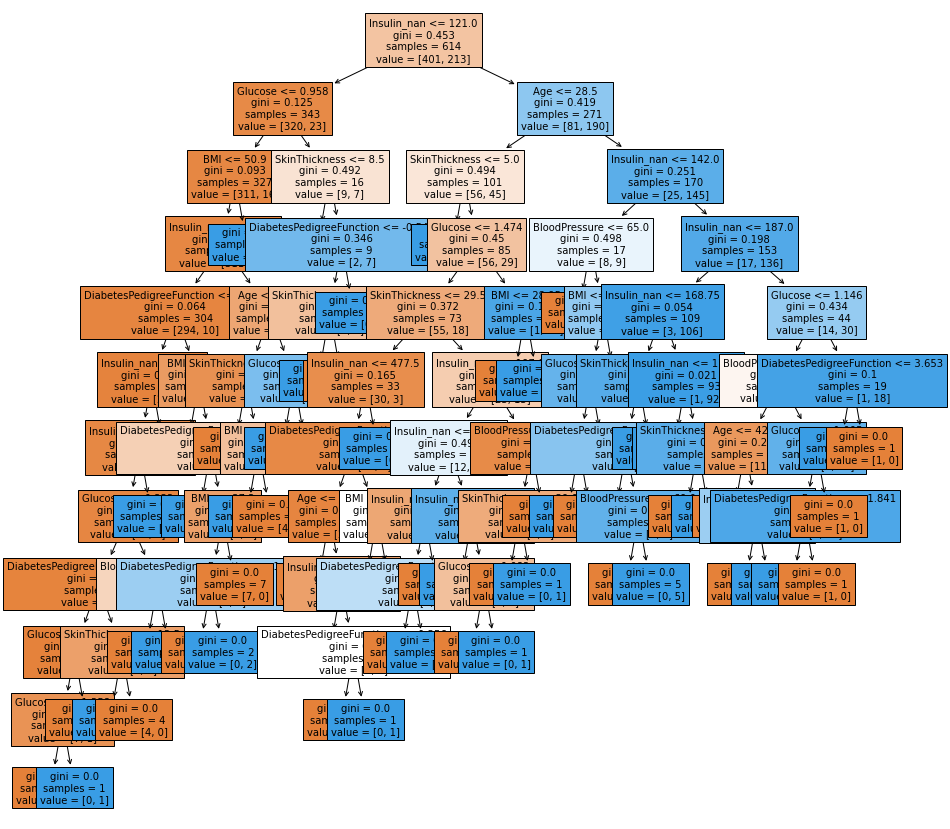

In [79]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [80]:
# 예측하고 결과를 y_predict 에 담기

y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

# 정확도(Accuracy) 측정하기

In [81]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당하기

abs(y_predict - y_test).sum()

28

In [82]:
# accuracy score 를 구하기

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

81.81818181818183